###Mini-Project 2
###Tanvir Alam
###January 18, 2021
```
Calculating the daily count of new cases and new deaths within 30 days of New York records, the difference in other state       counties, and this data will perform an EDA while showing findings through different plots and visualization techniques.
```











In [45]:
#download programs as listed
import numpy as np
import pandas as pd
from numpy.random import randn
np.random.seed(123)
import matplotlib.pyplot as plot
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import timedelta, date

In [46]:
#plug in function dataset: date, state, fips, cases, deaths
data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
936738,2021-01-16,Sweetwater,Wyoming,56037.0,3280,26.0
936739,2021-01-16,Teton,Wyoming,56039.0,2614,4.0
936740,2021-01-16,Uinta,Wyoming,56041.0,1813,9.0
936741,2021-01-16,Washakie,Wyoming,56043.0,841,23.0


In [47]:
#delete the column 'fips'  aka Federal Information Processing Standards
drop_cols = ['fips']
data.drop(drop_cols, inplace=True, axis=1)
data

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
936738,2021-01-16,Sweetwater,Wyoming,3280,26.0
936739,2021-01-16,Teton,Wyoming,2614,4.0
936740,2021-01-16,Uinta,Wyoming,1813,9.0
936741,2021-01-16,Washakie,Wyoming,841,23.0


In [48]:
#renamed the titles
data.rename(columns={'date': 'Number of Days', 'cases': 'Number of cases', 'deaths': 'Number of deaths'}, inplace=True)
data

,Number of Days,county,state,Number of cases,Number of deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
936738,2021-01-16,Sweetwater,Wyoming,3280,26.0
936739,2021-01-16,Teton,Wyoming,2614,4.0
936740,2021-01-16,Uinta,Wyoming,1813,9.0
936741,2021-01-16,Washakie,Wyoming,841,23.0


In [49]:
#groupby to discover how many states count the most deaths
data.groupby(['state'])['Number of deaths'].size().sort_values(ascending=False)

state
Texas                       71066
Georgia                     47769
Virginia                    39014
Kentucky                    34732
Missouri                    33205
Illinois                    29869
North Carolina              29608
Iowa                        28870
Kansas                      28557
Tennessee                   28447
Indiana                     27542
Ohio                        26250
Minnesota                   25467
Michigan                    24714
Mississippi                 24566
Nebraska                    24096
Arkansas                    22400
Oklahoma                    22328
Wisconsin                   21287
Florida                     20586
Puerto Rico                 20319
Pennsylvania                20147
Alabama                     20018
Louisiana                   19573
Colorado                    18679
South Dakota                17740
New York                    17736
California                  17729
West Virginia               15726
North Da

In [50]:
#New York data around the 30 day count
#specifying days lowest to highest
data3 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', index_col="state")
data3 = data2.loc["New York"]
print(data3)




                date         county     fips  cases  deaths
state                                                      
New York  2020-03-01  New York City      NaN      1     0.0
New York  2020-03-02  New York City      NaN      1     0.0
New York  2020-03-03  New York City      NaN      2     0.0
New York  2020-03-04  New York City      NaN      2     0.0
New York  2020-03-04    Westchester  36119.0      9     0.0
...              ...            ...      ...    ...     ...
New York  2021-01-16     Washington  36115.0   1424    21.0
New York  2021-01-16          Wayne  36117.0   3568    50.0
New York  2021-01-16    Westchester  36119.0  82932  1780.0
New York  2021-01-16        Wyoming  36121.0   2075    41.0
New York  2021-01-16          Yates  36123.0    783    16.0

[17736 rows x 5 columns]


In [51]:
#deleting duplicates
data3.drop_duplicates(subset=['date']). tail(30)

,date,county,fips,cases,deaths
state,,,,,
New York,2020-12-18,Albany,36001.0,8821,177.0
New York,2020-12-19,Albany,36001.0,8997,179.0
New York,2020-12-20,Albany,36001.0,9174,180.0
New York,2020-12-21,Albany,36001.0,9377,183.0
New York,2020-12-22,Albany,36001.0,9586,184.0
New York,2020-12-23,Albany,36001.0,9786,190.0
New York,2020-12-24,Albany,36001.0,10045,192.0
New York,2020-12-25,Albany,36001.0,10274,194.0
New York,2020-12-26,Albany,36001.0,10489,195.0


```
We can assume a differece in the 30 days count as within New York county of Albany shows the recent date is counted as more     deaths around 250 counts.
```

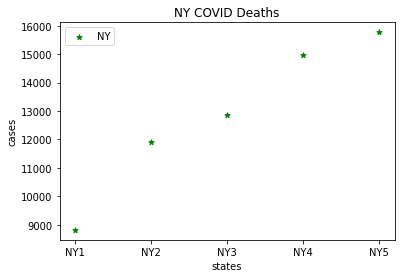

In [52]:
#set up a few data analysis with scatter and plots
x = ['NY1','NY2', 'NY3', 'NY4', 'NY5' ]
y = [8821, 11917, 12852, 14974, 15771 ]
plt.scatter(x, y, label="NY", color="green",
            marker="*", s=30)
plt.xlabel('states')
plt.ylabel('cases')
plt.title('NY COVID Deaths')
plt.legend()
plt.show()




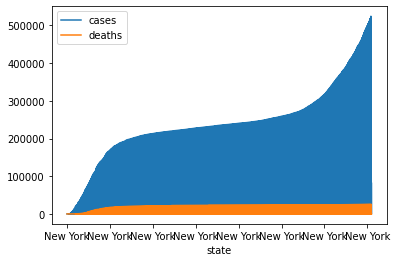

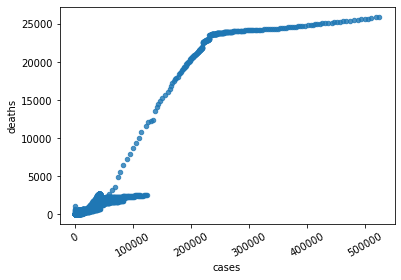

In [53]:
#this demonstrates another diagram for New york
data3.plot(y=["cases", "deaths"])
data3.plot(kind="scatter", x="cases", y="deaths", alpha=.8, rot=30)

# Conclusion 1
```
Within 30 days' New York city is rank high with states like Texas, Georgia, and Virgina who sold higher deaths over 30000. 

From the graphs above you can see the total number of death in different states, also the number of cases increase seen in New   York the amount of cases raised to 15771 in Albany county. So we can say as the days go by the number of cases will increase.

```

In [54]:
#the difference between two states
data.iloc[930225]

Number of Days      2021-01-14
county                Waukesha
state                Wisconsin
Number of cases          40764
Number of deaths           410
Name: 930225, dtype: object

In [55]:
data.iloc[930242]

Number of Days      2021-01-14
county                 Natrona
state                  Wyoming
Number of cases           7021
Number of deaths           103
Name: 930242, dtype: object

In [56]:
#On January 14, 2021 both Wisconsin county Waukesha and Wyoming county Natrona are the highest cases in their state 

In [57]:
#create dataset for Wyoming
data4 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', index_col="state")
data4.loc['Wyoming'].tail(50)

,date,county,fips,cases,deaths
state,,,,,
Wyoming,2021-01-14,Teton,56039.0,2579,4.0
Wyoming,2021-01-14,Uinta,56041.0,1794,9.0
Wyoming,2021-01-14,Washakie,56043.0,836,23.0
Wyoming,2021-01-14,Weston,56045.0,602,4.0
Wyoming,2021-01-15,Albany,56001.0,3647,10.0
Wyoming,2021-01-15,Big Horn,56003.0,911,22.0
Wyoming,2021-01-15,Campbell,56005.0,4450,45.0
Wyoming,2021-01-15,Carbon,56007.0,1087,16.0
Wyoming,2021-01-15,Converse,56009.0,884,13.0


In [58]:
#Then Wisconsin
data4.loc['Wisconsin'].tail(50)

,date,county,fips,cases,deaths
state,,,,,
Wisconsin,2021-01-16,Green,55045.0,2614,14.0
Wisconsin,2021-01-16,Green Lake,55047.0,1822,17.0
Wisconsin,2021-01-16,Iowa,55049.0,1840,9.0
Wisconsin,2021-01-16,Iron,55051.0,556,36.0
Wisconsin,2021-01-16,Jackson,55053.0,2527,20.0
Wisconsin,2021-01-16,Jefferson,55055.0,7985,68.0
Wisconsin,2021-01-16,Juneau,55057.0,2839,14.0
Wisconsin,2021-01-16,Kenosha,55059.0,15392,259.0
Wisconsin,2021-01-16,Kewaunee,55061.0,2373,27.0


Text(0.5, 1.0, 'Death counts from COVID')

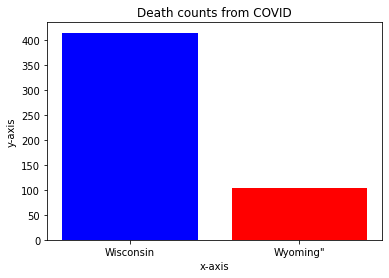

In [59]:
#Bar graph for both
left = [ 1, 2,]
height =[415, 103]
tick_label = ['Wisconsin', 'Wyoming"']
plt.bar(left, height, tick_label = tick_label, 
        width =0.8, color =['blue', 'red'])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Death counts from COVID')


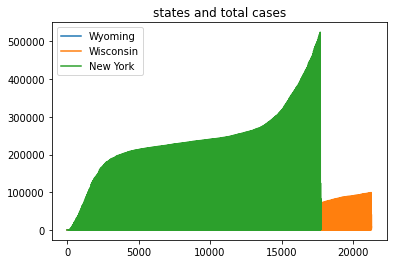

In [60]:
#Another example but added New York records
states = ['Wyoming', 'Wisconsin', 'New York']

for s in states:
  data_ = data.query(f"state == '{s}'").reset_index()
  plt.plot(data_['Number of cases'], label=s)

plt.title('states and total cases')
plt.legend()


# Conclusion 2
```
The two diagrams at first we can see Winsconsin has more cases in the county of Waukesha on the start of 2021 than Wyoming      highest count in county  Natrona.

This is prior to January 14, 2021 the most recent update on cases recorded

let say we add another state to be New york the second diagram describe how New york has the highest counts of cases in 2020 and 2021.

Westchester the county in New york is counted as 80868 cases, therefore, highest recorded case is New york according to my data and the second is Wisconsin.
```